<a href="https://colab.research.google.com/github/edenau/Bike-Sharing-Systems-Optimization/blob/master/work/NN/colab/netcdf_flattening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install xarray using conda
#!pip install xarray
#!pip install netcdf4
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local -c conda-forge xarray dask netCDF4 bottleneck

import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

--2019-01-20 15:50:38--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.16.19.10, 104.16.18.10, 2606:4700::6810:130a, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.16.19.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   101MB/s    in 5.0s    

2019-01-20 15:50:43 (111 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ saved [577996269/577996269]

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: intel-openmp-2018.0.0-hc7b2577_8 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libgfortran-ng-7.2.0-h9f7466a_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: bzip2-1.0.6-h9a117a8_4

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, ceil
import seaborn as sns

import xarray as xr
#import tensorflow as tf
print('All packages imported.')

All packages imported.


In [3]:
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Check data list
!ls "/content/gdrive/My Drive/Colab Notebooks/NN/data/"

ARM_1hrlater.csv			      ARM_6hrcumul.csv
ARM_1hrlater.gsheet			      ARM_no_dropna.cdf
ARM_1hrlater_RFclassified.csv		      ARM_strict_dropna.csv
ARM_1hrlater_RFclassified_threshold_0.05.csv  pairplot_month_ALL.png


In [70]:
  # Read data
  f = "/content/gdrive/My Drive/Colab Notebooks/NN/data/ARM_no_dropna.cdf"
  DS = xr.open_dataset(f)
  DS = DS.drop(['z10','z2'])
  DS

<xarray.Dataset>
Dimensions:   (p: 37, time: 131496)
Coordinates:
  * time      (time) datetime64[ns] 1996-01-01T00:30:00 ... 2010-12-31T23:30:00
  * p         (p) float32 1000.0 975.0 950.0 925.0 ... 175.0 150.0 125.0 100.0
Data variables:
    T_p       (time, p) float64 ...
    rh_p      (time, p) float64 ...
    u_p       (time, p) float64 ...
    v_p       (time, p) float64 ...
    prec_sfc  (time) float64 ...

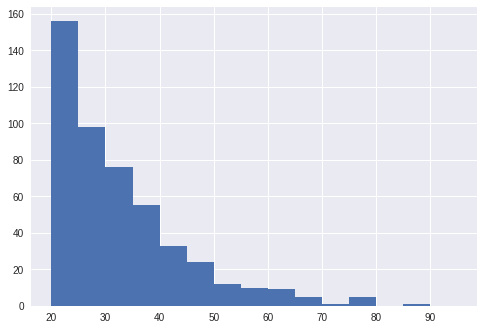

In [71]:
# Build multiple DataArray to collapse pressure coord
precip = DS['prec_sfc'] # the only DataArray with no pressure coord
binwidth = 5 # 5mm range for each bin of histogram
plt.hist(precip.dropna(dim='time'), bins=range(20, 100, binwidth)) # ignore rains with <20mm
plt.show()

da_list = ['precip'] # initialize list of DataArray

plev = DS['p'].values.astype(np.int32) # array of pressure level
var_p_list = ['T_p','rh_p','u_p','v_p'] # array of variables with pressure coord

for _var in var_p_list:
  for _p in plev:
    new_var_str = (_var + str(_p)) # new variable name (in string)
    da_list.append(new_var_str) # append the new variable
    exec("{} = DS[_var].sel(p=_p).drop('p')".format(new_var_str)) # assign DataArray
    exec("{} = {}.rename('{}')".format(new_var_str,new_var_str,new_var_str)) # rename data variables to avoid merge collision

In [72]:
# Merge DataArray and Build a new DataSet
DS_new = xr.Dataset()
for _var in da_list:
  exec("DS_new = xr.merge([DS_new,{}])".format(_var))
  
DS_new

<xarray.Dataset>
Dimensions:   (time: 131496)
Coordinates:
  * time      (time) datetime64[ns] 1996-01-01T00:30:00 ... 2010-12-31T23:30:00
Data variables:
    prec_sfc  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    T_p1000   (time) float64 ...
    T_p975    (time) float64 ...
    T_p950    (time) float64 ...
    T_p925    (time) float64 ...
    T_p900    (time) float64 ...
    T_p875    (time) float64 ...
    T_p850    (time) float64 ...
    T_p825    (time) float64 ...
    T_p800    (time) float64 ...
    T_p775    (time) float64 ...
    T_p750    (time) float64 ...
    T_p725    (time) float64 ...
    T_p700    (time) float64 ...
    T_p675    (time) float64 ...
    T_p650    (time) float64 ...
    T_p625    (time) float64 ...
    T_p600    (time) float64 ...
    T_p575    (time) float64 ...
    T_p550    (time) float64 ...
    T_p525    (time) float64 ...
    T_p500    (time) float64 ...
    T_p475    (time) float64 ...
    T_p450    (time) float64 ...
    T

In [73]:
# Convert DataSet to dataframe
df = DS_new.to_dataframe().reset_index() # convert index (time) to a column

# Find time difference between consecutive entries
hour_delta = df['time'].astype(np.int64).rolling(window=2).apply(lambda j: j[1] - j[0]) / 10**9 / 3600
for _hd in range(1,24+1):
  _cnt = hour_delta[hour_delta==_hd].count()
  if _cnt > 0:
    print('hour_delta= {}, count= {}'.format(_hd,_cnt))

hour_delta= 1, count= 131495


In [0]:
# Find out the shift of the parameter (column) of interest that maximizes our non-NaN sample size

for shift in range(1,24+1):
  df_shift = df.copy() # deep copy
  prec_sfc_next = df['prec_sfc'][shift:].values # turn to np values to get rid of index
  for j in range(1,shift+1):
    prec_sfc_next = np.append(prec_sfc_next,float('NaN')) # consistent length
  df_shift.insert(loc=0, column='prec_sfc_next', value=prec_sfc_next) # insert the shifted column
  print('#shifted hour= ' + str(shift) + ', sample size= ' + str((~df_shift.isnull().T.any()).sum()))

#shifted hour= 1, sample size= 4847
#shifted hour= 2, sample size= 4848
#shifted hour= 3, sample size= 4846
#shifted hour= 4, sample size= 4845
#shifted hour= 5, sample size= 4845
#shifted hour= 6, sample size= 4843
#shifted hour= 7, sample size= 4842
#shifted hour= 8, sample size= 4841
#shifted hour= 9, sample size= 4842
#shifted hour= 10, sample size= 4841
#shifted hour= 11, sample size= 4843
#shifted hour= 12, sample size= 4840
#shifted hour= 13, sample size= 4837
#shifted hour= 14, sample size= 4836
#shifted hour= 15, sample size= 4835
#shifted hour= 16, sample size= 4835
#shifted hour= 17, sample size= 4835
#shifted hour= 18, sample size= 4835
#shifted hour= 19, sample size= 4834
#shifted hour= 20, sample size= 4831
#shifted hour= 21, sample size= 4832
#shifted hour= 22, sample size= 4832
#shifted hour= 23, sample size= 4833
#shifted hour= 24, sample size= 4829


In [74]:
# Decided to take 1-hour shifted precipitation as labels

prec_sfc_1hrlater = df['prec_sfc'][1:].values # ditto
prec_sfc_1hrlater = np.append(prec_sfc_1hrlater,float('NaN')) 
try: # enable re-run
  df.insert(loc=0, column='prec_sfc_1hrlater', value=prec_sfc_1hrlater)
except:
  print('Column prec_sfc_1hrlater has already inserted.')

df_no_nan = df[~df.isnull().T.any()] # delete rows with incomplete data
print('#shifted hour= ' + str(1) + ', sample size= ' + str(len(df_no_nan)) + ', it should match the previous')
df_no_nan

#shifted hour= 1, sample size= 4847, it should match the previous


,prec_sfc_1hrlater,time,prec_sfc,T_p1000,T_p975,T_p950,T_p925,T_p900,T_p875,T_p850,...,v_p325,v_p300,v_p275,v_p250,v_p225,v_p200,v_p175,v_p150,v_p125,v_p100
14524,0.049667,1997-08-28 04:30:00,0.047667,299.979401,297.850006,295.649994,294.116669,292.449982,291.121796,290.321411,...,-3.694841,-8.905457,-8.430822,-11.832866,-15.014605,-13.703352,-4.340648,3.429173,0.061024,-2.429142
14758,0.050000,1997-09-06 22:30:00,0.050000,299.540466,297.363037,295.245453,294.180420,295.295441,292.979156,290.387482,...,3.635570,0.696846,-5.836888,-6.929137,-16.164400,-16.350965,-8.582373,2.699558,1.369764,2.531068
14782,0.050492,1997-09-07 22:30:00,0.050000,300.308807,297.945831,295.690002,293.509094,291.936371,292.528259,291.256226,...,-0.570785,-6.294807,-5.568968,-2.439126,-3.171939,-3.827843,-1.925839,0.171745,4.252823,0.654523
15046,0.050000,1997-09-18 22:30:00,0.051311,299.845459,297.649994,295.542297,293.750000,292.582153,292.483337,290.667236,...,-1.414140,-6.250647,-13.632689,-19.243462,-23.677080,-24.335115,-17.825041,-12.481750,3.124845,1.017899
15142,0.050000,1997-09-22 22:30:00,0.050000,299.509094,297.286346,295.541656,294.620270,292.957153,291.267487,290.323151,...,-2.055194,-0.635155,0.038826,-0.884923,-3.075891,-3.622608,-4.358087,-0.225894,1.109643,-4.608153
15166,0.050000,1997-09-23 22:30:00,0.050000,299.473816,297.358337,295.208313,293.661438,293.036835,291.484985,290.468597,...,-1.871192,0.079552,1.479049,-2.326284,-11.745255,-13.823651,-8.587365,-0.627821,4.487830,-2.143723
15214,0.045902,1997-09-25 22:30:00,0.980678,299.505005,297.845642,296.184784,295.038452,293.588470,291.712067,290.653229,...,7.619709,7.176747,4.833903,-1.715490,-1.584804,-2.180600,-5.345045,6.249083,7.325176,0.537335
15238,0.050000,1997-09-26 22:30:00,0.048197,300.169037,297.968170,296.011902,294.509094,293.063629,292.125000,290.736847,...,-3.801949,-1.510288,-0.065602,1.140482,1.721500,0.712793,-1.762484,-5.165653,-5.962721,-3.889105
15286,0.057627,1997-09-28 22:30:00,0.050339,299.997833,297.831818,296.725006,295.858582,294.429413,293.002930,291.541412,...,0.789057,-4.094765,-8.825696,-11.111882,-13.857169,-13.698687,-9.175197,-2.952761,-4.772560,-6.912055
15382,0.050000,1997-10-02 22:30:00,0.050000,299.795441,297.564270,295.384979,293.574982,292.259094,291.237488,290.362000,...,-0.079788,-3.749264,-5.678204,-9.683691,-10.290372,1.890432,9.836006,9.294689,-3.343925,-8.170444


In [75]:
import datetime as dt

df_no_nan['hour'] = hour24 = df_no_nan['time'].dt.hour.values
hour_dis = df_no_nan.groupby(['hour']).count().iloc[:,0]
hour_dis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


hour
0      166
1        2
2        1
4        6
5        1
11    2005
12     225
13       4
14       1
22     223
23    2213
Name: prec_sfc_1hrlater, dtype: int64

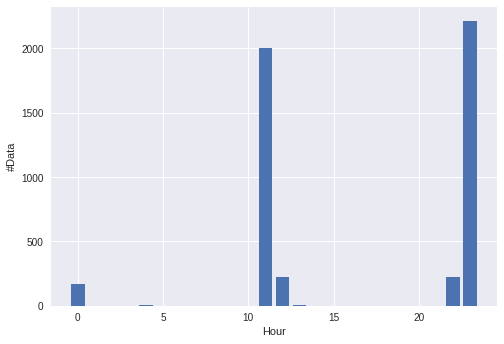

In [76]:
plt.bar(hour_dis.index, hour_dis)
plt.xlabel('Hour')
plt.ylabel('#Data')
f = "/content/gdrive/My Drive/Colab Notebooks/NN/fig/hour_inbalance.eps"
plt.savefig(f)
plt.show()

In [77]:
# Generate cyclic hour
hour24 = df_no_nan['time'].dt.hour.values
theta_hour = 2*np.pi * hour24/24
try:
  df_no_nan.insert(loc=0, column='hour_sin', value=np.sin(theta_hour))
except:
  print('Column hour_sin has already inserted.')
try:
  df_no_nan.insert(loc=0, column='hour_cos', value=np.cos(theta_hour))
except:
  print('Column hour_cos has already inserted.')
  
df_nn = df_no_nan.reset_index().drop(columns=['time','index']) # delete time column, reset index
df_nn

,hour_cos,hour_sin,prec_sfc_1hrlater,prec_sfc,T_p1000,T_p975,T_p950,T_p925,T_p900,T_p875,...,v_p300,v_p275,v_p250,v_p225,v_p200,v_p175,v_p150,v_p125,v_p100,hour
0,0.500000,8.660254e-01,0.049667,0.047667,299.979401,297.850006,295.649994,294.116669,292.449982,291.121796,...,-8.905457,-8.430822,-11.832866,-15.014605,-13.703352,-4.340648,3.429173,0.061024,-2.429142,4
1,0.866025,-5.000000e-01,0.050000,0.050000,299.540466,297.363037,295.245453,294.180420,295.295441,292.979156,...,0.696846,-5.836888,-6.929137,-16.164400,-16.350965,-8.582373,2.699558,1.369764,2.531068,22
2,0.866025,-5.000000e-01,0.050492,0.050000,300.308807,297.945831,295.690002,293.509094,291.936371,292.528259,...,-6.294807,-5.568968,-2.439126,-3.171939,-3.827843,-1.925839,0.171745,4.252823,0.654523,22
3,0.866025,-5.000000e-01,0.050000,0.051311,299.845459,297.649994,295.542297,293.750000,292.582153,292.483337,...,-6.250647,-13.632689,-19.243462,-23.677080,-24.335115,-17.825041,-12.481750,3.124845,1.017899,22
4,0.866025,-5.000000e-01,0.050000,0.050000,299.509094,297.286346,295.541656,294.620270,292.957153,291.267487,...,-0.635155,0.038826,-0.884923,-3.075891,-3.622608,-4.358087,-0.225894,1.109643,-4.608153,22
5,0.866025,-5.000000e-01,0.050000,0.050000,299.473816,297.358337,295.208313,293.661438,293.036835,291.484985,...,0.079552,1.479049,-2.326284,-11.745255,-13.823651,-8.587365,-0.627821,4.487830,-2.143723,22
6,0.866025,-5.000000e-01,0.045902,0.980678,299.505005,297.845642,296.184784,295.038452,293.588470,291.712067,...,7.176747,4.833903,-1.715490,-1.584804,-2.180600,-5.345045,6.249083,7.325176,0.537335,22
7,0.866025,-5.000000e-01,0.050000,0.048197,300.169037,297.968170,296.011902,294.509094,293.063629,292.125000,...,-1.510288,-0.065602,1.140482,1.721500,0.712793,-1.762484,-5.165653,-5.962721,-3.889105,22
8,0.866025,-5.000000e-01,0.057627,0.050339,299.997833,297.831818,296.725006,295.858582,294.429413,293.002930,...,-4.094765,-8.825696,-11.111882,-13.857169,-13.698687,-9.175197,-2.952761,-4.772560,-6.912055,22
9,0.866025,-5.000000e-01,0.050000,0.050000,299.795441,297.564270,295.384979,293.574982,292.259094,291.237488,...,-3.749264,-5.678204,-9.683691,-10.290372,1.890432,9.836006,9.294689,-3.343925,-8.170444,22


In [0]:
# Export it into .csv
f = "/content/gdrive/My Drive/Colab Notebooks/data/ARM_1hrlater.csv"
df_nn.to_csv(f)